In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.datasets import make_blobs

Shape of dataset: (50000, 2)


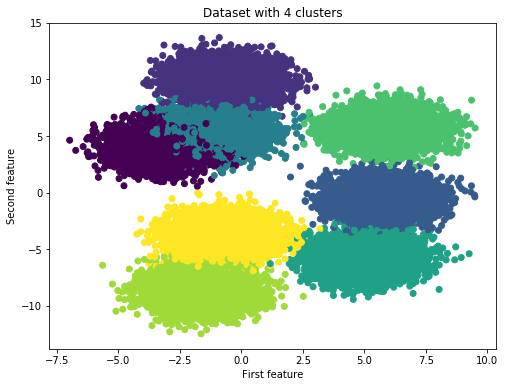

In [3]:
X, y = make_blobs(centers=8, n_samples=50000)
print(f'Shape of dataset: {X.shape}')

fig = plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=y)
plt.title("Dataset with 4 clusters")
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()

In [4]:
class KMeans():
    def __init__(self, n_clusters=4):
        self.k = n_clusters

    def fit(self, data):
        
        n_samples, _ = data.shape
        self.centers = np.array(random.sample(list(data), self.k))
        self.initial_centers = np.copy(self.centers)

        
        old_assigns = None
        n_iters = 0

        while True:
            new_assigns = [self.classify(datapoint) for datapoint in data]

            if new_assigns == old_assigns:
                print(f"Training finished after {n_iters} iterations!")
                return

            old_assigns = new_assigns
            n_iters += 1

            for id_ in range(self.k):
                points_idx = np.where(np.array(new_assigns) == id_)
                datapoints = data[points_idx]
                self.centers[id_] = datapoints.mean(axis=0)

    def l2_distance(self, datapoint):
        dists = np.sqrt(np.sum((self.centers - datapoint)**2, axis=1))
        return dists

    def classify(self, datapoint):
       
        dists = self.l2_distance(datapoint)
        return np.argmin(dists)

    def plot_clusters(self, data):
        plt.figure(figsize=(12,10))
        plt.title("Initial centers in black, final centers in red")
        plt.scatter(data[:, 0], data[:, 1], marker='.', c=y)
        plt.scatter(self.centers[:, 0], self.centers[:,1], c='r')
        plt.scatter(self.initial_centers[:, 0], self.initial_centers[:,1], c='k')
        plt.show()

In [5]:
kmeans = KMeans(n_clusters=8)
kmeans.fit(X)

Training finished after 13 iterations!


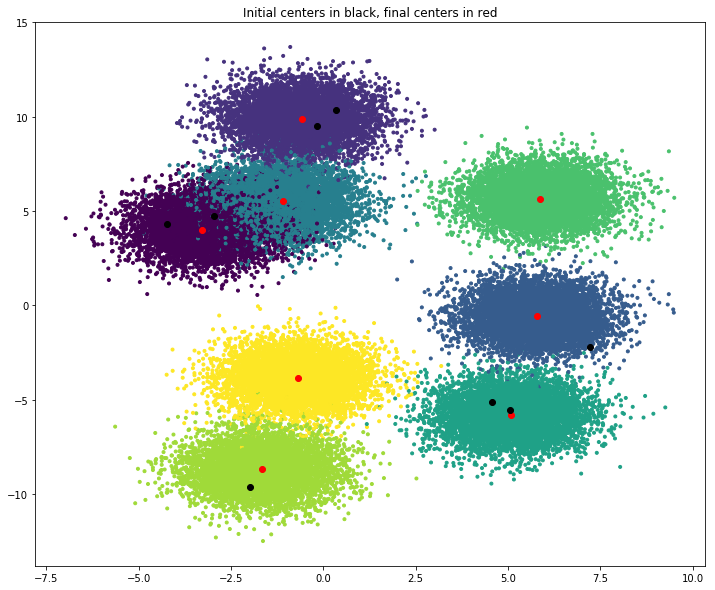

In [6]:
kmeans.plot_clusters(X)
